# Projekt LAB 1 Dane Facebook 
Maciej Klimiuk , Hanna Mika



In [694]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics._regression import root_mean_squared_error
from scipy.stats import boxcox
from sklearn.preprocessing import PolynomialFeatures






In [695]:
# Wczytaj dane
data = pd.read_csv("data.csv", sep=";")
# nowa kolumna o nazwie koszty = przychód - zysk 
data["Koszty w mln $"] = data["Przychód w mln $"] - data["Zysk w mln $"]
print(data)


     Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  Użytkownicy_mln  \
0   2007               153          -138           450                0   
1   2008               272           -56           850                0   
2   2009               777           229          1218              360   
3   2010              1974           606          2127              608   
4   2011              3711          1000          3200              845   
5   2012              5089            53          4619             1056   
6   2013              7872          1500          6337             1228   
7   2014             12466          2940          9199             1393   
8   2015             17928          3688         12691             1591   
9   2016             27638         10217         17048             1860   
10  2017             40653         15934         25105             2129   

    Koszty w mln $  
0              291  
1              328  
2              548  
3             1

In [696]:

# wszystkie korelacje
print(data.corr())


                       Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  \
Rok               1.000000          0.892709      0.800024      0.917137   
Przychód w mln $  0.892709          1.000000      0.977588      0.997597   
Zysk w mln $      0.800024          0.977588      1.000000      0.962063   
Zatrudnienie      0.917137          0.997597      0.962063      1.000000   
Użytkownicy_mln   0.996088          0.893330      0.805706      0.916392   
Koszty w mln $    0.930780          0.991064      0.940772      0.997032   

                  Użytkownicy_mln  Koszty w mln $  
Rok                      0.996088        0.930780  
Przychód w mln $         0.893330        0.991064  
Zysk w mln $             0.805706        0.940772  
Zatrudnienie             0.916392        0.997032  
Użytkownicy_mln          1.000000        0.928180  
Koszty w mln $           0.928180        1.000000  


Współczynniki modelu R^2:  0.8121169252480658
Współczynnik modelu RMSE: 16285286.357758908
Współczynniki modelu R^2:  0.9714964274383514
Współczynnik modelu RMSE: 4462872.080936857
Odchylenie standardowe modelu2: 3044.4702431536757


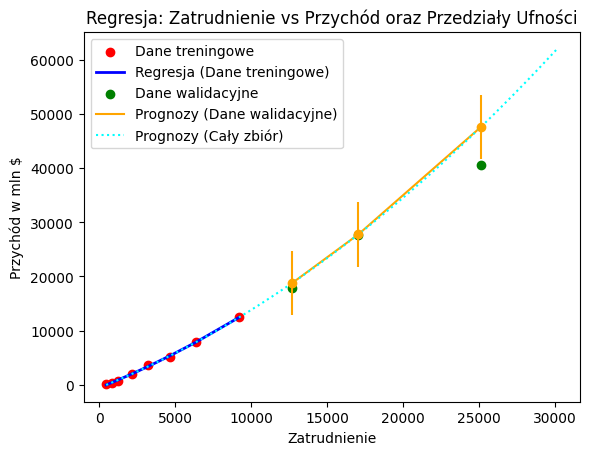

Wzór regresji kwadratowej: y = -526.7069795869229 + 1.119395477790044 * x + 3.175135170954074e-05 * x^2


In [697]:

#3. Przychód(OY)  liczba pracowników (OX)


#model kwadratowy nr 1
# dane testowe pierwsze 6 wartosci, kolejne 3 wartosci to dane walidacyjne
y_train = data["Przychód w mln $"][:8]
y_test = data["Przychód w mln $"][8:]
X_train = data[["Zatrudnienie"]][:8]
X_test = data[["Zatrudnienie"]][8:]


# zmiana danych na wielomianowe stopnia 2
X_train_poly = np.c_[X_train, X_train**2]
X_test_poly = np.c_[X_test, X_test**2]

# trenowanie modelu
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

# prognozy dla danych walidacyjnych
y_pred_test = model2.predict(X_test_poly)

print("Współczynniki modelu R^2: ", model2.score(X_test_poly, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

print("Współczynniki modelu R^2: ", model2.score(np.c_[data[["Zatrudnienie"]], data[["Zatrudnienie"]]**2], data["Przychód w mln $"]))
print("Współczynnik modelu RMSE:", mean_squared_error(data["Przychód w mln $"], model2.predict(np.c_[data[["Zatrudnienie"]], data[["Zatrudnienie"]]**2])))


# prognozy dla całego zbioru danych
data["Prognoza_Przychód"] = model2.predict(np.c_[data[["Zatrudnienie"]], data[["Zatrudnienie"]]**2])



# Wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
# Linia przerywana dla regresji danych treningowych
plt.plot(
    X_train,
    model2.predict(X_train_poly),
    color='blue',
    linewidth=2,
    label='Regresja (Dane treningowe)'
)
# odchylenie standardowe modelu2 np.std
print("Odchylenie standardowe modelu2:", np.std(model2.predict(X_test_poly) - y_test))

plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')
plt.plot(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')

# Wydłużenie linii regresji dla całego zbioru
zatrudnienie_extended = np.linspace(data["Zatrudnienie"].min(), data["Zatrudnienie"].max() * 1.2, 500)
prognoza_extended = model2.predict(
    np.c_[zatrudnienie_extended, zatrudnienie_extended**2]
)
# Linia przerywana dla regresji całego zbioru
plt.plot(zatrudnienie_extended, prognoza_extended, color='cyan', linestyle='dotted', label='Prognozy (Cały zbiór)')
#bar error
plt.legend()
# Obliczenie reszt modelu (różnice między przewidywaniami a rzeczywistymi wartościami)
residuals = y_test - y_pred_test

# Odchylenie standardowe reszt
std_error = np.std(residuals)

# Wyznaczenie przedziału ufności
confidence_interval = 1.96 * std_error  # 95% przedział ufności

# Dodanie errorbar
plt.errorbar(
    X_test.squeeze(),
    y_pred_test,
    yerr=confidence_interval,
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)
plt.xlabel("Zatrudnienie")
plt.ylabel("Przychód w mln $")
plt.title("Regresja: Zatrudnienie vs Przychód oraz Przedziały Ufności")
plt.show()

# wzór regresji kwadratowej

# y = a0 + a1*x + a2*x^2
a0 = model2.intercept_
a1 = model2.coef_[0]
a2 = model2.coef_[1]

print("Wzór regresji kwadratowej:", f"y = {a0} + {a1} * x + {a2} * x^2")



Współczynniki modelu R^2:  -2.319240121965183
Współczynnik modelu RMSE: 0.4151189379392353


D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



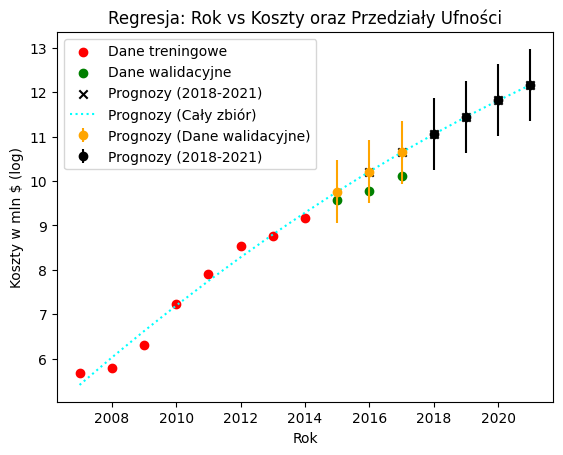

In [698]:
# Podział na dane treningowe i walidacyjne
X_train = data[["Rok"]][:8]
X_test = data[["Rok"]][8:]
y_train = data["Koszty w mln $"][:8]
y_test = data["Koszty w mln $"][8:]

# Przekształcenie na logarytmy Osi OY
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Zmiana danych na wielomianowe stopnia 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Trenowanie modelu
model = LinearRegression()
model.fit(X_train_poly, y_train_log)

# Prognozy dla danych walidacyjnych
y_pred_test_log = model.predict(X_test_poly)

# Ocena jakości modelu na danych walidacyjnych (R^2) oraz RMSE dla modelu liniowego ale z logarytmami
print("Współczynniki modelu R^2: ", model.score(X_test_poly, y_test_log))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test_log, y_pred_test_log, squared=False))

# Prognoza i wypisanie wartości dla lat 2018-2021
X_future = pd.DataFrame({"Rok": [2018, 2019, 2020, 2021]})
data_future = pd.concat([data, X_future], axis=0)
data_future_poly = poly.transform(data_future[["Rok"]])
data_future["Prognoza_Koszty"] = np.exp(model.predict(data_future_poly))

# Wykres
plt.scatter(X_train, y_train_log, color='red', label='Dane treningowe')
plt.scatter(X_test, y_test_log, color='green', label='Dane walidacyjne')

# Error bar dla danych walidacyjnych
plt.errorbar(
    X_test.squeeze(),
    y_pred_test_log,
    yerr=1.96 * np.std(y_pred_test_log),
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)

# Error bar dla data_future
plt.errorbar(
    data_future[["Rok"]][11:],
    np.log(data_future["Prognoza_Koszty"][11:]),
    yerr=1.96 * np.std(np.log(data_future["Prognoza_Koszty"][11:])),
    fmt='o',
    color='black',
    label='Prognozy (2018-2021)'
)

# Zaznaczenie prognoz dla lat 2018-2021
plt.scatter(data_future[["Rok"]][9:], np.log(data_future["Prognoza_Koszty"][9:]), color='black', label='Prognozy (2018-2021)', marker='x')

# Jedna linia dla regresji dane z treningu i walidacji oraz prognozy
plt.plot(data_future[["Rok"]], np.log(data_future["Prognoza_Koszty"]), color='cyan', linestyle='dotted', label='Prognozy (Cały zbiór)')

plt.legend()
plt.xlabel("Rok")
plt.ylabel("Koszty w mln $ (log)")
plt.title("Regresja: Rok vs Koszty oraz Przedziały Ufności")
plt.show()

In [699]:
#4. Liczba pracowników (OX) przychód(OY)

# dane treningowe to pierwsze 8 rekordów, a dane walidacyjne to ostatnie 3 rekordy
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnych

# trenowanie modelu
X_train = data[["Zatrudnienie"]][:8]
X_test = data[["Zatrudnienie"]][8:]
y_train = data["Przychód w mln $"][:8]
y_test = data["Przychód w mln $"][8:]

# Funkcja testująca każde podejście
def test_transformations(X_train, X_test, y_train, y_test):
    results = []

    # 1. Logarytmiczna transformacja na y
    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    model_log_y = LinearRegression().fit(X_train, y_train_log)
    y_pred_log = model_log_y.predict(X_test)
    y_pred_original = np.exp(y_pred_log)
    results.append({
        "Transformation": "Logarithmic on y",
        "R2": r2_score(y_test, y_pred_original),
        "RMSE": mean_squared_error(y_test, y_pred_original, squared=False)
    })

    # 2. Logarytmiczna transformacja na X
    X_train_log = np.log(X_train)
    X_test_log = np.log(X_test)
    model_log_x = LinearRegression().fit(X_train_log, y_train)
    y_pred_log_x = model_log_x.predict(X_test_log)
    results.append({
        "Transformation": "Logarithmic on X",
        "R2": r2_score(y_test, y_pred_log_x),
        "RMSE": mean_squared_error(y_test, y_pred_log_x, squared=False)
    })

    # 3. Pierwiastkowa transformacja na y
    y_train_sqrt = np.sqrt(y_train)
    y_test_sqrt = np.sqrt(y_test)
    model_sqrt_y = LinearRegression().fit(X_train, y_train_sqrt)
    y_pred_sqrt = model_sqrt_y.predict(X_test)
    y_pred_original_sqrt = y_pred_sqrt ** 2
    results.append({
        "Transformation": "Square root on y",
        "R2": r2_score(y_test, y_pred_original_sqrt),
        "RMSE": mean_squared_error(y_test, y_pred_original_sqrt, squared=False)
    })

    # 4. Kwadratowa transformacja na X
    X_train_squared = X_train ** 2
    X_test_squared = X_test ** 2
    model_squared_x = LinearRegression().fit(X_train_squared, y_train)
    y_pred_squared_x = model_squared_x.predict(X_test_squared)
    results.append({
        "Transformation": "Squared on X",
        "R2": r2_score(y_test, y_pred_squared_x),
        "RMSE": mean_squared_error(y_test, y_pred_squared_x, squared=False)
    })

    # 5. Regresja wielomianowa (stopień 2)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model_poly = LinearRegression().fit(X_train_poly, y_train)
    y_pred_poly = model_poly.predict(X_test_poly)
    results.append({
        "Transformation": "Polynomial degree 2 on X",
        "R2": r2_score(y_test, y_pred_poly),
        "RMSE": mean_squared_error(y_test, y_pred_poly, squared=False)
    })

    # 6. Regresja wielomianowa (stopień 3)
    poly = PolynomialFeatures(degree=3)
    X_train_poly3 = poly.fit_transform(X_train)
    X_test_poly3 = poly.transform(X_test)
    model_poly3 = LinearRegression().fit(X_train_poly3, y_train)
    y_pred_poly3 = model_poly3.predict(X_test_poly3)
    results.append({
        "Transformation": "Polynomial degree 3 on X",
        "R2": r2_score(y_test, y_pred_poly3),
        "RMSE": mean_squared_error(y_test, y_pred_poly3, squared=False)
    })

    return results

# Testowanie transformacji
results = test_transformations(X_train, X_test, y_train, y_test)

# Wypisanie wyników
for res in results:
    print(f"Transformation: {res['Transformation']}")
    print(f"R2: {res['R2']:.4f}, RMSE: {res['RMSE']:.4f}\n")



Transformation: Logarithmic on y
R2: -7294558.6527, RMSE: 25145102.5060

Transformation: Logarithmic on X
R2: -3.1676, RMSE: 19006.2014

Transformation: Square root on y
R2: -9.5979, RMSE: 30308.4508

Transformation: Squared on X
R2: -10.1824, RMSE: 31133.0332

Transformation: Polynomial degree 2 on X
R2: 0.8121, RMSE: 4035.5032

Transformation: Polynomial degree 3 on X
R2: 0.1355, RMSE: 8656.5737



D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

Współczynniki modelu R^2:  -1.23099631834478
Współczynnik modelu RMSE: 20709789.269111127


D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



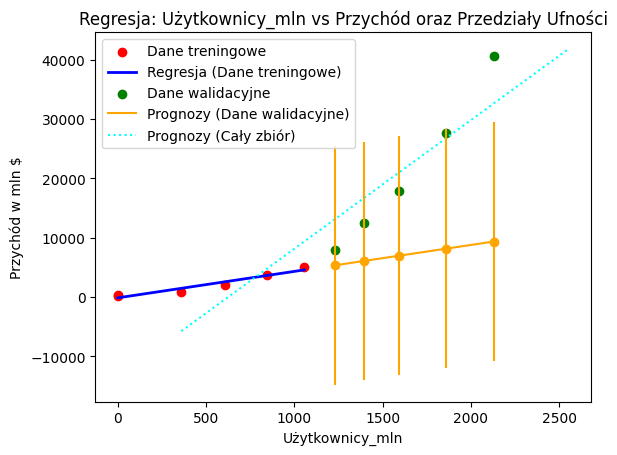

D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

overflow encountered in exp



In [700]:
# DO PRZEMYŚLENIA
#1. Przychód (OY) od liczby użytkowników (OX)

# dane treningowe to pierwsze 8 rekordów, a dane walidacyjne to ostatnie 3 rekordy
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnych
#Dane walidacyjne są używane do oceny jakości modelu
#Następnie przewidujemy wartości dla całego zbioru danych, aby zobaczyć, jak model zachowuje się na całym zbiorze danych


# trenowanie modelu
X_train = data[["Użytkownicy_mln"]][:6]
X_test = data[["Użytkownicy_mln"]][6:]
y_train = data["Przychód w mln $"][:6]
y_test = data["Przychód w mln $"][6:]

#usuwanie wartości 0 z danych
data = data[data["Użytkownicy_mln"] != 0]



model1 = LinearRegression()
model1.fit(X_train, y_train)

# prognozy dla danych walidacyjnych
y_pred_test = model1.predict(X_test)

# drugi model z całym zbiorem danych
model2 = LinearRegression()
model2.fit(data[["Użytkownicy_mln"]], data["Przychód w mln $"])

# ocena jakości modelu na danych walidacyjnych
print("Współczynniki modelu R^2: ", model1.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(data["Przychód w mln $"], model2.predict(data[["Użytkownicy_mln"]])))

# prognozy dla całego zbioru danych
data["Prognoza_Przychód"] = model2.predict(data[["Użytkownicy_mln"]])


# Wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
# Linia przerywana dla regresji danych treningowych
plt.plot(
    X_train,
    model1.predict(X_train),
    color='blue',
    linewidth=2,
    label='Regresja (Dane treningowe)'
)

plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')
plt.plot(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')
# Wydłużenie linii regresji dla całego zbioru
użytkownicy_extended = np.linspace(data["Użytkownicy_mln"].min(), data["Użytkownicy_mln"].max() * 1.2, 500)
prognoza_extended = model2.predict(
    użytkownicy_extended.reshape(-1, 1)
)
# Linia przerywana dla regresji całego zbioru
plt.plot(użytkownicy_extended, prognoza_extended, color='cyan', linestyle='dotted', label='Prognozy (Cały zbiór)')
#bar error
plt.legend()
# Obliczenie reszt modelu (różnice między przewidywaniami a rzeczywistymi wartościami)
residuals = y_test - y_pred_test

# Odchylenie standardowe reszt
std_error = np.std(residuals)

# Wyznaczenie przedziału ufności
confidence_interval = 1.96 * std_error  # 95% przedział ufności

# Dodanie errorbar
plt.errorbar(
    X_test.squeeze(),
    y_pred_test,
    yerr=confidence_interval,
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)
plt.xlabel("Użytkownicy_mln")
plt.ylabel("Przychód w mln $")
plt.title("Regresja: Użytkownicy_mln vs Przychód oraz Przedziały Ufności")
plt.show()




# Nowy model regresji liniowej z funckją wykładniczą
# dane treningowe to pierwsze 6 lat, a dane waliacyjne to ostatnie 3 lata



# trenowanie modelu



X_train_poly = np.c_[X_train, np.exp(X_train)]



# trenowanie modelu
model3 = LinearRegression()



Współczynniki modelu R^2:  0.9419825653067996
Współczynnik modelu RMSE: 2798.799727889784
Prognozy użytkowników na lata 2018-2021:
     Rok  Prognoza_Użytkownicy
2   2009            398.142857
3   2010            604.885714
4   2011            811.628571
5   2012           1018.371429
6   2013           1225.114286
7   2014           1431.857143
8   2015           1638.600000
9   2016           1845.342857
10  2017           2052.085714
0   2018           2258.828571
1   2019           2465.571429
2   2020           2672.314286
3   2021           2879.057143




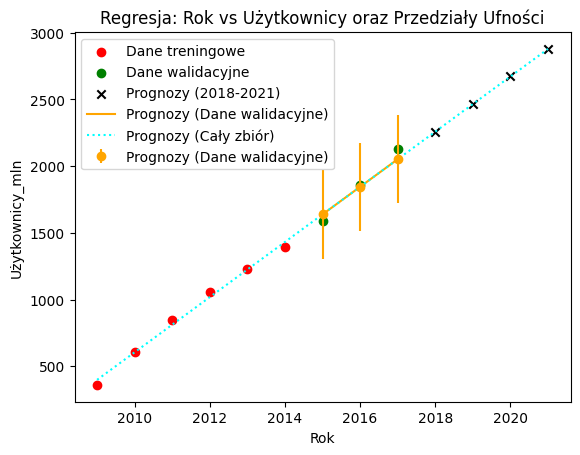

Wzór regresji liniowej: y = -414948.2571428572 + 206.74285714285716 * x


In [701]:
#5. Liczba użytkowników (OY) od czasu (OX)

# dane treningowe to pierwsze 6 rekordów, a dane walidacyjne to ostatnie 3 rekordy
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnyc

# trenowanie modelu
X_train = data[["Rok"]][:6]
X_test = data[["Rok"]][6:]
y_train = data["Użytkownicy_mln"][:6]
y_test = data["Użytkownicy_mln"][6:]

# trenowanie modelu
model4 = LinearRegression()
model4.fit(X_train, y_train)

# prognozy dla danych walidacyjnych
y_pred_test = model4.predict(X_test)

# ocena jakości modelu na danych walidacyjnych
print("Współczynniki modelu R^2: ", model4.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))


# wypisanie wartosci na lata 2018-2021
X_future = pd.DataFrame({"Rok": [2018, 2019, 2020, 2021]})
data_future = pd.concat([data, X_future], axis=0)
data_future["Prognoza_Użytkownicy"] = model4.predict(data_future[["Rok"]])

print("Prognozy użytkowników na lata 2018-2021:")
print(data_future[["Rok", "Prognoza_Użytkownicy"]])
# przerwa /n
print("\n")


# wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')

# prognozy punktowe dla lat 2018-2021
plt.scatter(data_future[["Rok"]][9:], data_future["Prognoza_Użytkownicy"][9:], color='black', label='Prognozy (2018-2021)', marker='x')
# error bar dla prognozowanych wartości Dla większej dokładności mógłbyś uwzględnić wariancję zależną od wartości przewidywanych (heteroskedastyczność
plt.errorbar(X_test, y_pred_test, yerr=1.96 * np.std(y_pred_test), fmt='o', color='orange', label='Prognozy (Dane walidacyjne)')
plt.plot(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')


# wykres predykcja modelu nr 5 linia przerywana
plt.plot(data_future[["Rok"]], data_future["Prognoza_Użytkownicy"], color='cyan',  linestyle='dotted'  , label='Prognozy (Cały zbiór)')

plt.legend()
plt.xlabel("Rok")
plt.ylabel("Użytkownicy_mln")
plt.title("Regresja: Rok vs Użytkownicy oraz Przedziały Ufności")
plt.show()

#wyliczenie współczynników modelu
a0 = model4.intercept_
a1 = model4.coef_[0]

print("Wzór regresji liniowej:", f"y = {a0} + {a1} * x")





In [702]:
# wykresy

fig = px.scatter_matrix(data)
fig.show()
 